# ***A Spam Mail prediction System Using Machine Learning with python.. I have used Logistic Regression to perform this project***

---



---



---



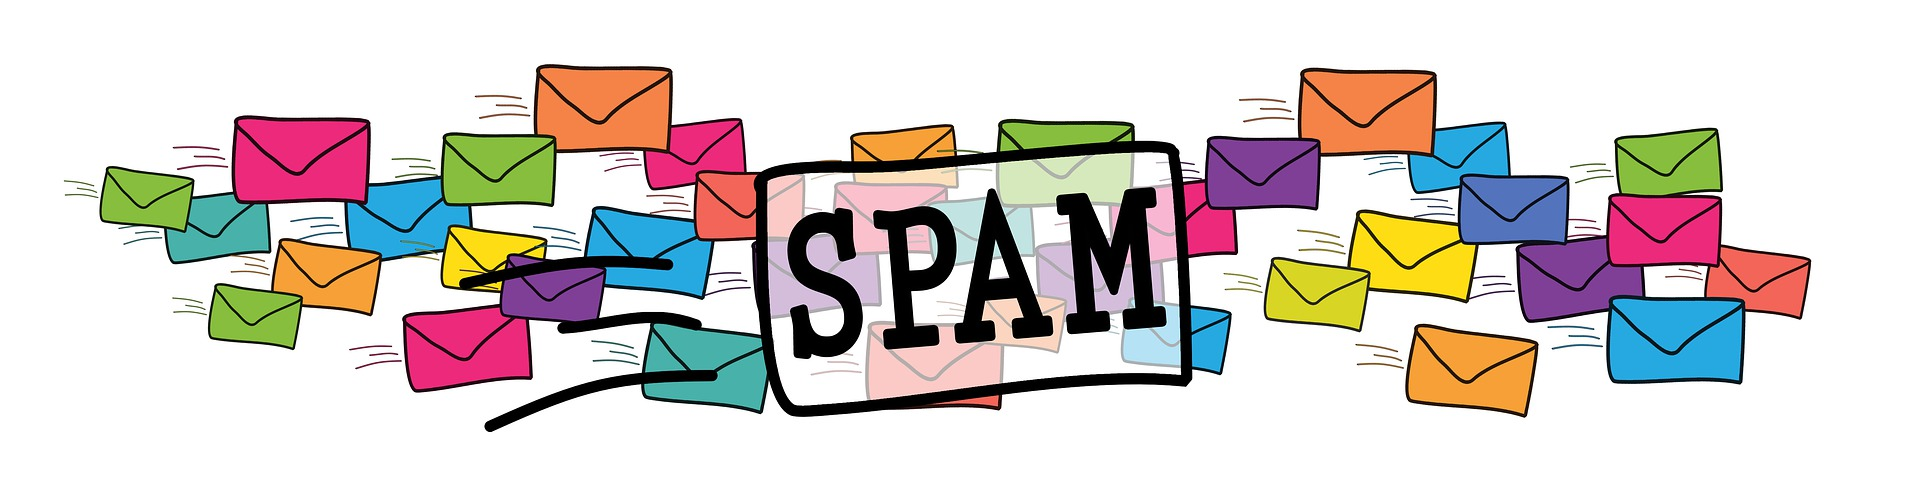

Importing The Dependencies

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Collection and Preprocessing 

In [280]:
# Loading the data from csv file to a pandas dataframe
df = pd.read_csv('mail_data.csv')

In [281]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [282]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [283]:
#Categorical features
print('Categorical features are described \n')
print(df['Category'].unique())

Categorical features are described 

['ham' 'spam']


In [284]:
#checking if there is any NULL values in the data, if there is then we will replace the values with a null string
df.isnull().sum()
mail = df.where((pd.notnull(df)), '')

In [285]:
mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [286]:
#checking the number of rows and columns in the dataframe
mail.shape

(5572, 2)

In [287]:
mail.columns

Index(['Category', 'Message'], dtype='object')

In [288]:
mail.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [289]:
mail.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


Label Encoding


In [290]:
#label spam mail as 0 and ham mail as 1:
mail.loc[mail['Category'] == 'spam', 'Category',] = 0
mail.loc[mail['Category'] == 'ham', 'Category',] = 1

SPAM = 0 

HAM = 1

In [291]:
#seperating the data as texts and label
X = mail['Message']
Y = mail['Category']

In [292]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [293]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [294]:
#splitting the dataset into the training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [295]:
print(X.shape)

(5572,)


In [296]:
print(X_train.shape)
print(X_train)

(4457,)
3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [297]:
print(X_test.shape)
print(X_test)

(1115,)
2632    URGENT! Your mobile No 077xxx WON a £2,000 Bon...
454     Ok i will tell her to stay out. Yeah its been ...
983     Congrats! 2 mobile 3G Videophones R yours. cal...
1282        Am I the only one who doesn't stalk profiles?
4610                               Y de asking like this.
                              ...                        
4827                        Haha, just what I was thinkin
5291      Xy trying smth now. U eat already? We havent...
3325    I don wake since. I checked that stuff and saw...
3561    Lol I know! Hey someone did a great inpersonat...
1136                      K do I need a login or anything
Name: Message, Length: 1115, dtype: object


In [298]:
print(Y_train.shape)
print(Y_train)

(4457,)
3075    1
1787    1
1614    1
4304    1
3266    0
       ..
789     0
968     1
1667    1
3321    1
1688    0
Name: Category, Length: 4457, dtype: object


In [299]:
print(Y_test.shape)
print(Y_test)

(1115,)
2632    0
454     1
983     0
1282    1
4610    1
       ..
4827    1
5291    1
3325    1
3561    1
1136    1
Name: Category, Length: 1115, dtype: object


Feature Extraction


In [300]:
#Transform the text data to feature vectors that can be usd as input to the logistic regression model
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

#convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test  = Y_test.astype('int')

In [301]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [302]:
print(X_test_features)

  (0, 7271)	0.1940327008179069
  (0, 6920)	0.20571591693537986
  (0, 5373)	0.2365698724638063
  (0, 5213)	0.1988547357502182
  (0, 4386)	0.18353336340308998
  (0, 1549)	0.2646498848307188
  (0, 1405)	0.3176863938914351
  (0, 1361)	0.25132445289897426
  (0, 1082)	0.2451068436245027
  (0, 1041)	0.28016206931555726
  (0, 405)	0.2381316303003606
  (0, 306)	0.23975986557206702
  (0, 20)	0.30668032384591537
  (0, 14)	0.26797874471323896
  (0, 9)	0.2852706805264544
  (0, 1)	0.2381316303003606
  (1, 7368)	0.29957800964520975
  (1, 6732)	0.42473488678029325
  (1, 6588)	0.3298937975962767
  (1, 6507)	0.26731535902873493
  (1, 6214)	0.3621564482127515
  (1, 4729)	0.22965776503163893
  (1, 4418)	0.3457696891316818
  (1, 3491)	0.496093956101028
  (2, 7205)	0.22341717215670331
  :	:
  (1110, 3167)	0.5718357066163949
  (1111, 7353)	0.4991205841293424
  (1111, 6787)	0.40050175714278885
  (1111, 6033)	0.4714849709283488
  (1111, 3227)	0.44384935772735523
  (1111, 2440)	0.4137350055985486
  (1112, 7071)

Training The Model


Logistic Regression


In [303]:
#Training the Logistic Model with the training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the Trained Model

In [304]:
# Prediction on the training data

from sklearn.metrics import accuracy_score
prediction_on_training_data = classifier.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [305]:
print('Accuracy on Training data : ', accuracy_on_training_data)

Accuracy on Training data :  0.9670181736594121


In [306]:
# Prediction on the test data

prediction_on_test_data = classifier.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [307]:
print('Accuracy on Test data : ', accuracy_on_test_data)

Accuracy on Test data :  0.9659192825112107


Building a Predective System

In [308]:
input_mail = ["WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

#Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

#Making presictions
prediction = classifier.predict(input_data_features)
print(prediction)

if (prediction[0] == 1):
  print('Ham Mail')

else:
  print('Spam Mail')  

[0]
Spam Mail


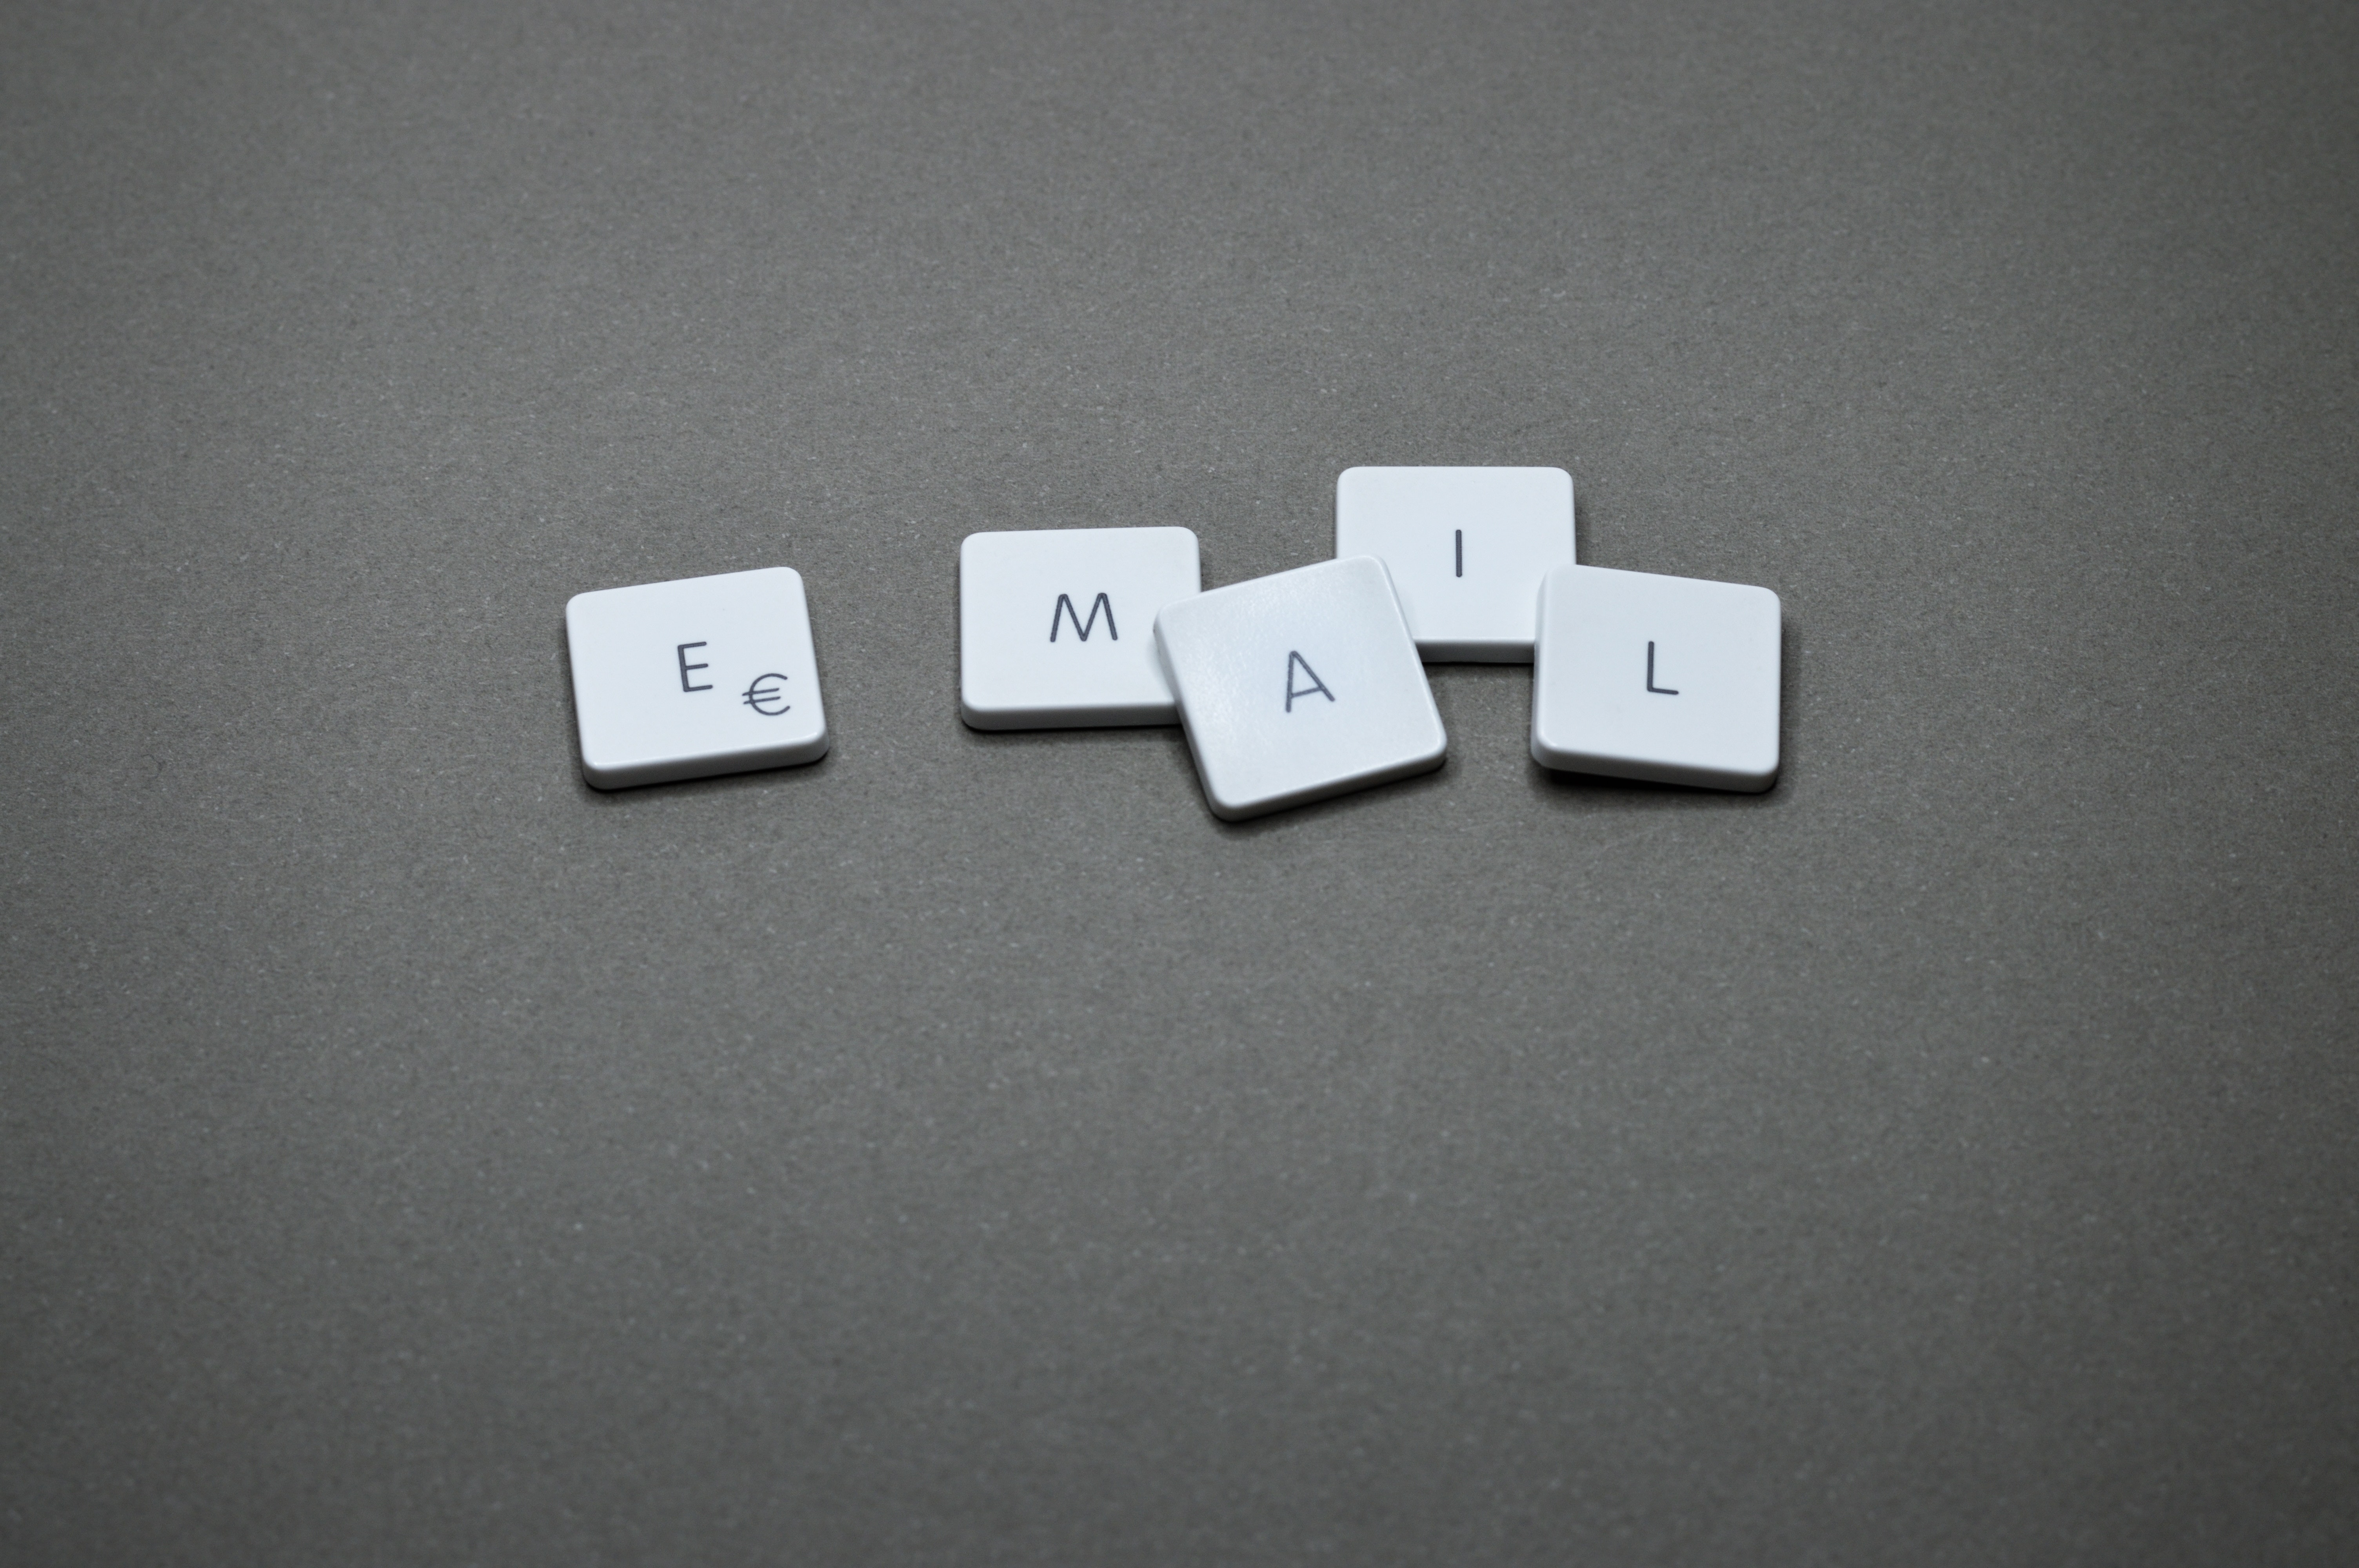